In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D,AveragePooling2D,Flatten,Dense
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
len(X_train)

60000

In [ ]:
len(X_test)

10000

In [ ]:
X_train=X_train.reshape(-1,28,28,1)
X_test=X_test.reshape(-1,28,28,1)

In [ ]:
X_train=X_train.reshape(-1,28,28,1)
X_test=X_test.reshape(-1,28,28,1)

In [ ]:
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [ ]:
model=Sequential()
model.add(Conv2D(filters=6,kernel_size=(5,5),activation='relu',input_shape=(28,28,1)))
model.add(AveragePooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=16,kernel_size=(5,5),activation='relu'))
model.add(AveragePooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=120,kernel_size=(4,4),activation='relu'))
model.add(Flatten())
model.add(Dense(84,activation='relu'))
model.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(X_train,y_train,epochs=10,batch_size=64,validation_split=0.2)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 24s 29ms/step - accuracy: 0.8699 - loss: 0.5120 - val_accuracy: 0.9805 - val_loss: 0.0651
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 39s 26ms/step - accuracy: 0.9816 - loss: 0.0613 - val_accuracy: 0.9812 - val_loss: 0.0608
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - accuracy: 0.9862 - loss: 0.0441 - val_accuracy: 0.9848 - val_loss: 0.0529
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 40s 27ms/step - accuracy: 0.9902 - loss: 0.0322 - val_accuracy: 0.9862 - val_loss: 0.0471
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.9887 - loss: 0.0336 - val_accuracy: 0.9834 - val_loss: 0.0615
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.9909 - loss: 0.0273 - val_accuracy: 0.9856 - val_loss: 0.0503
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 27ms/step - accuracy: 0.9928 - loss: 0.0226 - val_accuracy: 0.9871 - val_loss: 0.0515
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 27ms/step - accuracy: 0.9949 - loss: 0.0173 - 

In [ ]:
y_pred=model.predict(X_test)
y_pred_classes=np.argmax(y_pred,axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [ ]:
y_test_labels = np.argmax(y_test, axis=1)
print("\nClassification Report:")
print(classification_report(y_test_labels, y_pred_classes))


Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.98      0.99      0.98      1010
           4       0.98      0.99      0.99       982
           5       0.99      0.98      0.98       892
           6       1.00      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
conf_matrix = confusion_matrix(y_test_labels, y_pred_classes)

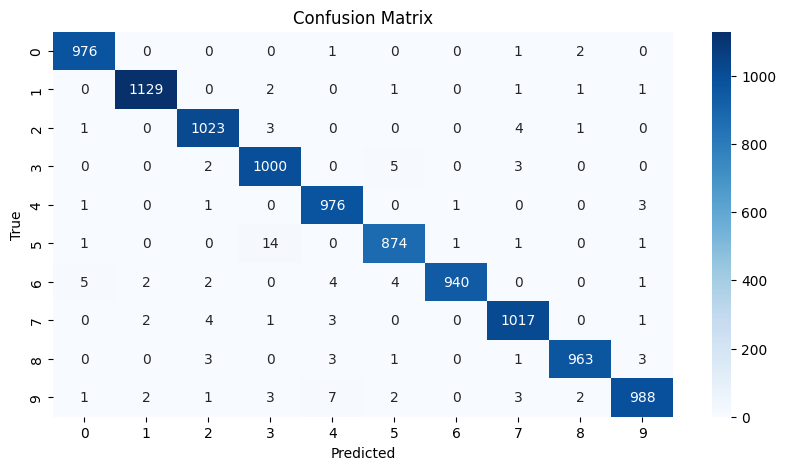

In [ ]:
plt.figure(figsize=(10, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

One with the data agumentation

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
)

In [ ]:
datagen.fit(X_train)

In [ ]:
model.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    validation_data=(X_test, y_test),
    epochs=10
)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 43ms/step - accuracy: 0.9487 - loss: 0.1731 - val_accuracy: 0.9880 - val_loss: 0.0412
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 42s 44ms/step - accuracy: 0.9761 - loss: 0.0763 - val_accuracy: 0.9878 - val_loss: 0.0393
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 44ms/step - accuracy: 0.9789 - loss: 0.0685 - val_accuracy: 0.9882 - val_loss: 0.0380
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 44ms/step - accuracy: 0.9809 - loss: 0.0633 - val_accuracy: 0.9889 - val_loss: 0.0337
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 44ms/step - accuracy: 0.9823 - loss: 0.0561 - val_accuracy: 0.9904 - val_loss: 0.0287
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 44ms/step - accuracy: 0.9835 - loss: 0.0529 - val_accuracy: 0.9925 - val_loss: 0.0219
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 43ms/step - accuracy: 0.9835 - loss: 0.0512 - val_accuracy: 0.9918 - val_loss: 0.0256
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 43ms/step - accuracy: 0.9846 - loss: 0.0517 - val_accurac

In [ ]:
y_pred=model.predict(X_test)
y_pred_classes=np.argmax(y_pred,axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [ ]:
y_test_labels = np.argmax(y_test, axis=1)
print("\nClassification Report:")
print(classification_report(y_test_labels, y_pred_classes))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       1.00      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.97      1.00      0.98      1010
           4       1.00      0.98      0.99       982
           5       0.98      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
conf_matrix = confusion_matrix(y_test_labels, y_pred_classes)

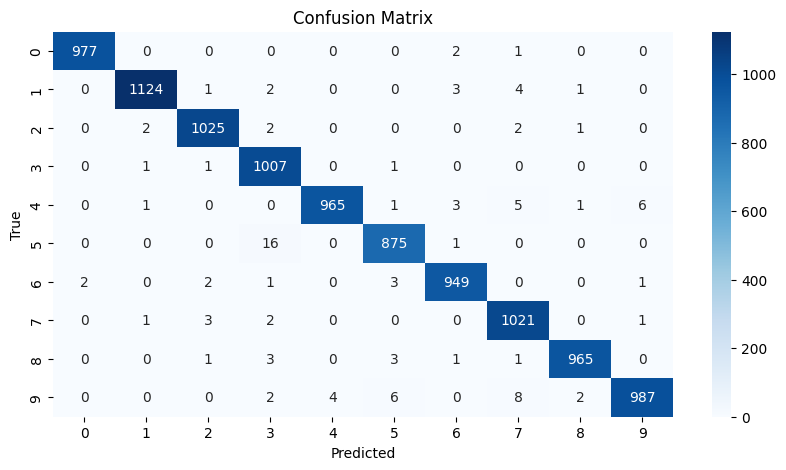

In [ ]:
plt.figure(figsize=(10, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    validation_data=(X_test, y_test),
    epochs=10
)


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 50s 53ms/step - accuracy: 0.9904 - loss: 0.0309 - val_accuracy: 0.9936 - val_loss: 0.0241
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 42s 44ms/step - accuracy: 0.9904 - loss: 0.0325 - val_accuracy: 0.9916 - val_loss: 0.0301
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 42s 45ms/step - accuracy: 0.9893 - loss: 0.0352 - val_accuracy: 0.9913 - val_loss: 0.0305
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 42s 45ms/step - accuracy: 0.9907 - loss: 0.0289 - val_accuracy: 0.9918 - val_loss: 0.0263
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 44ms/step - accuracy: 0.9905 - loss: 0.0330 - val_accuracy: 0.9906 - val_loss: 0.0353
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 42s 45ms/step - accuracy: 0.9914 - loss: 0.0296 - val_accuracy: 0.9918 - val_loss: 0.0302
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 44ms/step - accuracy: 0.9901 - loss: 0.0312 - val_accuracy: 0.9922 - val_loss: 0.0267
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 44ms/step - accuracy: 0.9903 - loss: 0.0315 - 

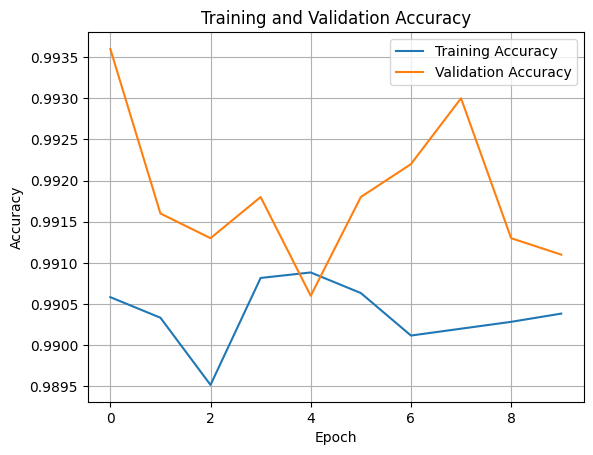

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
